## 激活函数

在机器学习中，特别是神经网络中，激活函数(`Activation Function`)是一个非常重要的组件。

- 神经元各输入的加权值`z`：$z = w_1x_1 + w_2x_2 + ... + w_nx_n$
- 神经元的输出`y`: $y = a(z)$
  > `a`就是`Activation Function`(激活函数）。    
  > 激活函数被应用于神经网络中神经元的输出上，以引入非线性特征，从而使神经网络能够学习和模拟复杂的非线性关系。
  

### 1. 激活函数的作用
1. **引入非线性：**
   > 神经元的加权输入值，没激活函数调用之前，其值`z`本质上是一个线性回归模型，其输出是输入的线性组合。
   > 激活函数能够引入非线性，使得神经网络能够逼近任何非线性函数。

   **线性函数**和**非线性函数**是数学中描述变量之间关系的两种基本方式，它们之间主要区别在于变量之间的关系是否可以用直线来表示。    
   线性函数的一般形式：$f(x) = wx + b$
2. **控制输出范围：**
   > 神经元输出值有时候我们需要的是0/1(不点火/点火),或者描述这个神经元的兴奋度(-N, N)即可。不需要线性函数得到的那个区间很大的值。
   > 激活函数可以将输出限制在特定的范围（比如：`-1 ~ 1`, `0 ~ 1`)。这样有助于稳定神经网络的训练过程。
3. **实现稀疏性：**
   > 某些函数（如ReLU及其变体）在输入为负数的时候，输出为`0`，这样有助于实现神经网络的稀疏性，从而提高神经网络的效率。

### 2. 常用的激活函数

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

#### 2.1 Sigmoid函数

- 公式： $\sigma(x) = \frac{1}{1 + e^{-x}}$
- 输出值：0到1之间
- 特点：常用语二分类问题的输出层。但是，由于其梯度在饱和区接近于零，可能导致梯度消失问题。


In [2]:
# 先计算x的点
x_line = np.linspace(-20, 20, 500, dtype=np.float32)
x_line.shape

(500,)

In [3]:
# 执行exp函数
np.exp(1), np.exp(-1)

(2.718281828459045, 0.36787944117144233)

In [4]:
# 定义sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(x * -1))

In [5]:
# 获取sigmoid的y值
y_line_sigmoid = sigmoid(x_line)
y_line_sigmoid.shape

(500,)

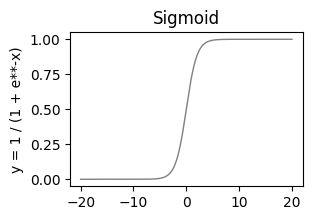

In [6]:
# 画图
fig = plt.figure(figsize=(3, 2), dpi=100)
plt.xlabel=("x")
plt.ylabel("y = 1 / (1 + e**-x)")
plt.plot(x_line, y_line_sigmoid, color="grey", linewidth=1)
plt.title("Sigmoid")
plt.show()

#### 2.2 Tanh函数（双曲正切函数）
- 公式：$\tanh(x) = \frac{e^x + e^{-x}}{e^x + e^{-x}}$
- 输出值：`-1 ~ 1`(-1到1之间)
- 特点：类似于`Sigmoid`函数，但是收敛速度更快。和`Sigmod`函数同样存在梯度消失问题。

**编写函数：**

In [7]:
def tanh(x):
    return (np.exp(x) - np.exp(-1 * x)) / (np.exp(x) + np.exp(-1 * x))

In [8]:
tanh(-1), tanh(0), tanh(1)

(-0.7615941559557649, 0.0, 0.7615941559557649)

In [9]:
# 获取tanh函数的y值
y_line_tanh = tanh(x_line)
y_line_tanh.shape

(500,)

**图形展示：tanh(x)**

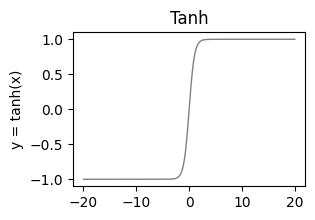

In [10]:
# 画图
fig = plt.figure(figsize=(3, 2), dpi=100)
plt.xlabel=("x")
plt.ylabel("y = tanh(x)")
plt.plot(x_line, y_line_tanh, color="grey", linewidth=1)
plt.title("Tanh")
plt.show()

#### 2.3 ReLU函数(Rectified Linear Unit)
- 公式：$f(x) = \max(0, x)$
- 输出值: `0~无穷大`, 当值小于等于0时是0, 当输入为正时，梯度为1(值为x)
- 特点：有助于环境梯度消失问题。同时由于其在负值时输出位零，实现了神经元的稀疏性。但是，当输入为负数时，梯度为0，可能导致神经元"死亡"。

**ReLU函数：**

In [11]:
def relu(x):
    return np.maximum(0, x)

In [12]:
# 获取relu函数的y值
y_line_relu = relu(x_line)
y_line_relu.shape

(500,)

**图像展示：relu**

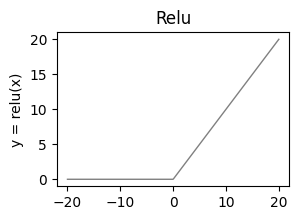

In [13]:
# 画图
fig = plt.figure(figsize=(3, 2), dpi=100)
plt.xlabel=("x")
plt.ylabel("y = relu(x)")
plt.plot(x_line, y_line_relu, color="grey", linewidth=1)
plt.title("Relu")
plt.show()

#### 2.4 Leaky ReLU函数
- 公式：$f(x) = max(\alpha x, x)$ ： 其中 $\alpha$是一个很小的整数（如：0.01, 0.0001)
- 输出值：负无穷到正无穷
- 特点：解决`ReLU`函数在负输入的时候梯度为零的问题，允许负输入有一定的梯度。

**Leaky ReLU函数：**

In [14]:
def leaky_relu(x, a=0.01):
    return np.maximum(a*x, x)

In [15]:
# 为了图形有点效果，我们设置a=0.1
y_line_leaky_relu = leaky_relu(x_line, a=0.1)
y_line_leaky_relu.shape

(500,)

In [16]:
y_line_leaky_relu[0]

-2.0

**图形展示：Leaky ReLU**

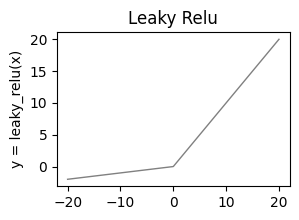

In [17]:
# 画图
fig = plt.figure(figsize=(3, 2), dpi=100)
plt.xlabel=("x")
plt.ylabel("y = leaky_relu(x)")
plt.plot(x_line, y_line_leaky_relu, color="grey", linewidth=1)
plt.title("Leaky Relu")
plt.show()

**除了`Leaky ReLU`还有`Parametric ReLU`**， 区别是：  
- 这个`PPReLU`的$\alpha$是可以学习的参数。
- `PPReLU`允许网络在训练过程中自适应地调整负输入的梯度。

#### 2.5 Softmax函数
- 公式：$Softmax(x_i) = \frac{e^{x_i}}{\sum_je^{x_i}}$  用于多分类问题的输出层，**将神经元的输出转换为概率分布。**
  > 其中，$x_i$是输入向量`x`的第`i`个元素，而分母是对输入向量`x`所有元素应用指数函数后的和。
- 输出值：`0 ~ 1`
- 特点：所有输出的和是`1`

**函数：Softmax**

In [18]:
def softmax(x):
    # 确保输入是NumPy数组
    # 对x中的每个元素都应用exp函数
    exp_x = np.exp(x - np.max(x))  # 减去最大值是为了防止数值溢出
    # 当x很大的时候，exp(x)可能会导致数据溢出，减去最大值，是一个常用的技巧，用于确保数值稳定
    
    # 计算所有exp的和
    sum_exp_x = np.sum(exp_x)
    # 将每个exp的值除以他们的和
    return exp_x / sum_exp_x

In [19]:
# 测试一下softmax
softmax(np.array([1.0, 2.0,  3.0]))

array([0.09003057, 0.24472847, 0.66524096])

In [20]:
y_line_softmax = softmax(x_line)
y_line_softmax.shape

(500,)

In [21]:
y_line_softmax.max(), y_line_softmax.min()

(0.07703163, 3.2725762e-19)

**图形展示：Softmax**

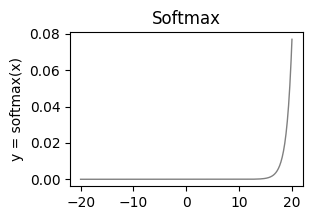

In [22]:
# 画图
fig = plt.figure(figsize=(3, 2), dpi=100)
plt.xlabel=("x")
plt.ylabel("y = softmax(x)")
plt.plot(x_line, y_line_softmax, color="grey", linewidth=1)
plt.title("Softmax")
plt.show()

#### 2.6 Mish
- 公式：
  1. ${softplus}(x) = \ln(1 + e^x)$
  2. $mish(x) = x * tanh(softplus(x))$

In [23]:
# mish函数
def softplus(x):
    return np.log(1 + np.exp(x))

def mish(x):
    return x * np.tanh(softplus(x))

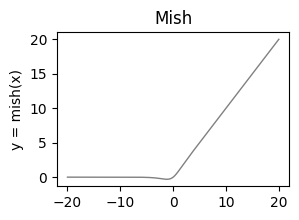

In [24]:
y_line_mish = mish(x_line)

# 画图
fig = plt.figure(figsize=(3, 2), dpi=100)
plt.xlabel=("x")
plt.ylabel("y = mish(x)")
plt.plot(x_line, y_line_mish, color="grey", linewidth=1)
plt.title("Mish")
plt.show()

#### 2.7 Swish

In [25]:
def sigmoid_beta(x, beta=1.0):  
    return 1 / (1 + np.exp(-beta * x))

def swish(x, beta=1.0):
    return x * sigmoid_beta(x, beta)

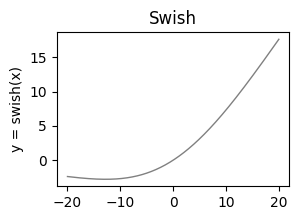

In [26]:
y_line_swish = swish(x_line, beta=0.1)

# 画图
fig = plt.figure(figsize=(3, 2), dpi=100)
plt.xlabel=("x")
plt.ylabel("y = swish(x)")
plt.plot(x_line, y_line_swish, color="grey", linewidth=1)
plt.title("Swish")
plt.show()

**另外** 还有`ELU`(Exponential Linear Unit)、`SELU`(Scaled Exponential Linear Unit)等，它们都是为了解决某些特点问题而设计的。

### 3. 一次展示7个激活函数图形

In [27]:
activation_functions = [
    {"name": "Sigmoid", "y": y_line_sigmoid},
    {"name": "Tanh", "y": y_line_tanh},
    {"name": "ReLU", "y": y_line_relu},
    {"name": "Leaky ReLU", "y": y_line_leaky_relu},
    {"name": "Softmax", "y": y_line_softmax},
    {"name": "Mish", "y": y_line_mish},
    {"name": "Swish", "y": y_line_swish},
]

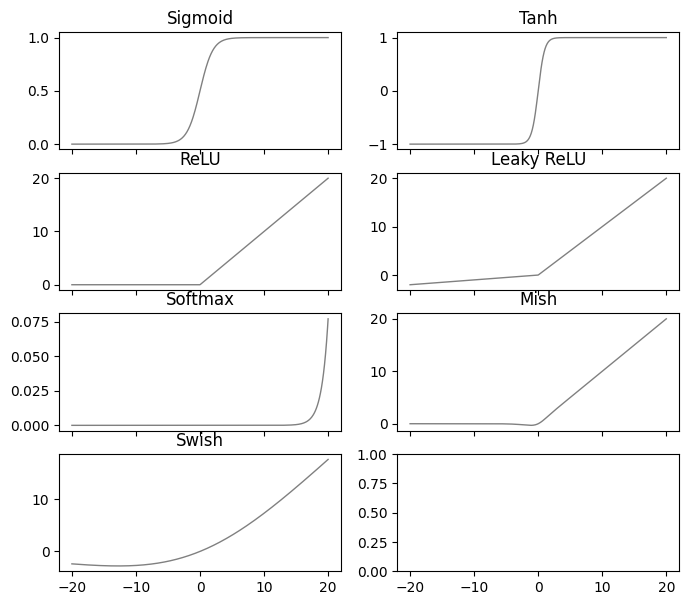

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(8, 7))

i = 0
for active in activation_functions:
    row = i // 2
    column = i % 2
    # axes[row][column].axis("off")
    axe = axes[row][column]
    axe.set_title(active["name"])
    axe.plot(x_line, active["y"], color="grey", linewidth=1)
    i += 1

# 隐藏最后一个子图
# axes[3][1].axis('off')
    
# 调整子图间距
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)